**Content Based Recommender System Based on Cosine Similarity.**

In this code we considered user preferences. Based on those we create a user-profile which is used to recommend similar attractions to the users. We used cosine similarity to calculate distance between the features and recommend the appropriate suggestions.

**Models Implemented using this technique are:**
1. Based on location type
2. Based on province your wants to visit
3. Based on the time of year user wants to visit
4. Based on mixed features(Previously visited location)


In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Now, we add our dataset here. To do that we need to upload the csv file on google colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attraction_new.csv to attraction_new.csv


Once the dataset is uploaded to colab, the next step is to call all the columns that we require to use.

In [ ]:
df_attractions = pd.read_csv('attraction_new.csv', sep=',', encoding='latin-1', usecols=['location_id','location_name','location_type', 'type_id','ratings', 'no. of rating', 'provience', 'cost', 'user_id', 'best_time_to_visit', 'visiting_hours', 'Address', 'Website_link', 'image_link'])
print(df_attractions.shape)
df_attractions.head(5)

(60, 14)


,location_id,location_name,location_type,type_id,ratings,no. of rating,provience,cost,user_id,best_time_to_visit,visiting_hours,Address,Website_link,image_link
0,0,Ripley's Aquarium of Canada,Aquariums,4,4.5,"20,326",ontario,15$,1,summer,Sun - Sat 10:00 AM - 8:00 PM,"288 Bremner Boulevard, Toronto, Ontario M5V 3L...",http://www.ripleyaquariums.com/canada,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,Mount Royal Park,Parks,2,3.0,"10,493",quebec,5$,1,fall,Sun - Sat 6:00 AM - 12:00 AM,"1260 Remembrance Road, Montreal, Quebec H3H 1A...",http://www.lemontroyal.qc.ca/en,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,Stanley Park,Parks,2,4.5,"28,722",BC,free,1,all time,Sun-Sat 8:00 AM- 6:00 PM,"Stanley Park Causeway, Vancouver, British Colu...",http://vancouver.ca/parks-recreation-culture/s...,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,Niagara Falls Canada,Points of Interest & Landmarks Waterfalls,4,1.0,"31,476",ontario,free,2,all time,Thu - Thu 12:00 AM - 11:59 PM,"Niagara Falls, Ontario L2G 3Y9 Canada",https://www.niagarafallstourism.com/,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,Old Quebec,Neighbourhoods Historic Walking Areas,5,5.0,"13,360",quebec,10$,2,summer,Sun - Sat 10:00 AM - 8:00 PM,"Rue de Tresor, Quebec City, Quebec GIR 5B8 Canada",http://whc.unesco.org/en/list/300,https://dynamic-media-cdn.tripadvisor.com/medi...


In [ ]:
print("Shape of frames: \n"+ " Attractions DataFrame"+ str(df_attractions.shape))


Shape of frames: 
 Attractions DataFrame(60, 14)


We can check how many ratings each user has given by using groupby functions on User Id

In [ ]:
ratings_grouped_by_users = df_attractions.groupby('user_id').agg([np.size, np.mean])
ratings_grouped_by_users.head(5)

location_id            type_id           ratings          
               size       mean    size      mean    size      mean
user_id                                                           
1                11  20.454545      11  3.636364    11.0  3.863636
2                12  23.833333      12  4.333333    12.0  4.083333
3                12  29.166667      12  5.666667    12.0  3.625000
4                15  34.266667      15  4.400000    15.0  4.166667
5                10  39.500000      10  4.600000    10.0  4.150000

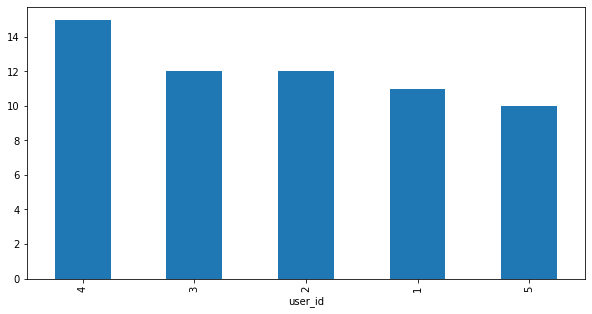

In [ ]:
ratings_grouped_by_users['ratings']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize = (10,5))


In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import process
def get_matches(query,choices):
  results = process.extract(query,choices)
  return results


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
get_matches("ONTar",df_attractions['provience'])

[('ontario', 83, 0),
 ('ontario', 83, 3),
 ('ontario', 83, 6),
 ('ontario', 83, 9),
 ('ontario', 83, 10)]

**Content based recommender system**

A Content-Based Recommender works by the data that we take from the user. By the data we create a user profile, which is then used to suggest to the user, as the user provides more input or take more actions on the recommendation, the engine becomes more accurate.

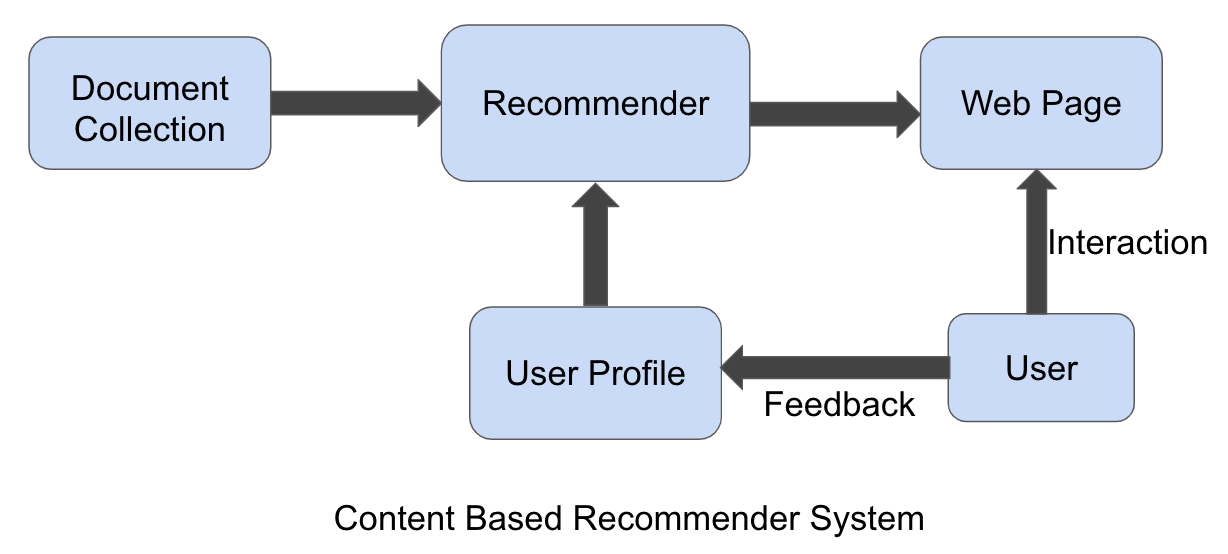

**Recommender System on the basis of location type**

We ask user input that which type if location do they want to visit. Based in the input we successfully provide recommendations to the user.

**TF-iDF Transformation** which is used to vectorise the text



In [ ]:
tfidf_attraction_type = TfidfVectorizer()
tfidf_attraction_type_matrix = tfidf_attraction_type.fit_transform(df_attractions['location_type'])
cosine_sim_attractions = linear_kernel(tfidf_attraction_type_matrix, tfidf_attraction_type_matrix)

In [ ]:
def get_recommendations_based_on_type(location_name, cosine_sim_attractions=cosine_sim_attractions):
    """
    Calculates top 2 attraction to recommend based on given location type. 
    """
    # Get the index of the attraction that matches the type
    #idx_attraction = process.extractOne(location_name, df_attractions.loc[df_attractions['location_name'].isin([location_name])])
    idx_attraction = df_attractions.loc[df_attractions['location_name'].isin([location_name])]
    idx_attraction = idx_attraction.index
    print(idx_attraction)
    
    # Get the pairwsie similarity scores of all attractions with that type
    sim_scores_attractions = list(enumerate(cosine_sim_attractions[idx_attraction][0]))
    
    # Sort the attractions based on the similarity scores
    sim_scores_attractions = sorted(sim_scores_attractions, key=lambda x: x[1], reverse=True)

    # Get the scores of the 3 most similar attractions
    sim_scores_attractions = sim_scores_attractions[1:3]
  
    # Get the movie indices
    attraction_indices = [i[0] for i in sim_scores_attractions]
    
    # Return the top 2 most similar movies
    return df_attractions['location_name'].iloc[attraction_indices]







In [ ]:
type_entered = input("Enter the location type: ")
#type_entered = process.extract(df_attractions['location_type'],type_entered)
loc = df_attractions.loc[df_attractions['location_type'].isin([type_entered])]
location_fetch = loc.iloc[0]['location_name']
get_recommendations_based_on_type(location_fetch)

**Recommender System on the basis of provience**

We ask user input that which provience do they want to visit. Based in the input we successfully provide recommendations to the user.

In [ ]:
tfidf_attraction_provience = TfidfVectorizer()
tfidf_attraction_provience_matrix = tfidf_attraction_provience.fit_transform(df_attractions['provience'])
cosine_sim_attractions_pro = linear_kernel(tfidf_attraction_provience_matrix, tfidf_attraction_provience_matrix)

In [ ]:
def get_recommendations_based_on_provience(location_name, cosine_sim_attractions_pro=cosine_sim_attractions_pro):
    """
    Calculates top 2 attraction to recommend based on given location type. 
    """
    
    idx_attraction_pro = df_attractions.loc[df_attractions['location_name'].isin([location_name])]
    idx_attraction_pro = idx_attraction_pro.index
    
    sim_scores_attractions_pro = list(enumerate(cosine_sim_attractions_pro[idx_attraction_pro][0]))
    
    # Sort the attractions based on the similarity scores
    sim_scores_attractions_pro = sorted(sim_scores_attractions_pro, key=lambda x: x[1], reverse=True)

    # Get the scores of the 2 most similar attractions
    sim_scores_attractions_pro = sim_scores_attractions_pro[1:3]
    
    # Get the attraction indices
    attraction_indices_pro = [i[0] for i in sim_scores_attractions_pro]
    
    # Return the top 2 most similar attraction
    return df_attractions['location_name'].iloc[attraction_indices_pro]


In [ ]:
type_entered = input("Enter the location provience: ")
loc = df_attractions.loc[df_attractions['provience'].isin([type_entered])]
provience_fetch = loc.iloc[0]['location_name']
get_recommendations_based_on_provience(provience_fetch)

Enter the location provience: ontario


3             Niagara Falls Canada
6    Parliament Hill and Buildings
Name: location_name, dtype: object

**Recommender System based on best time to visit**

We ask user input that which time of the year do thay want to visit. Based in the input we successfully provide recommendations to the user.

In [ ]:
tfidf_attraction_best_time = TfidfVectorizer()
tfidf_attraction_best_time_matrix = tfidf_attraction_best_time.fit_transform(df_attractions['best_time_to_visit'])
cosine_sim_attractions_best_time = linear_kernel(tfidf_attraction_best_time_matrix, tfidf_attraction_best_time_matrix)

In [ ]:
def get_recommendations_based_on_best_time(location_name, cosine_sim_attractions_best_time=cosine_sim_attractions_best_time):
    """
    Calculates top 2 attraction to recommend based on given best time to visit. 
    """
    
    idx_attraction_best_time = df_attractions.loc[df_attractions['location_name'].isin([location_name])]
    idx_attraction_best_time = idx_attraction_best_time.index
    
    # Get the pairwsie similarity scores of all attraction with that name
    sim_scores_attractions_best_time = list(enumerate(cosine_sim_attractions_best_time[idx_attraction_best_time][0]))

    # Sort the attractions based on the similarity scores
    sim_scores_attractions_best_time = sorted(sim_scores_attractions_best_time, key=lambda x: x[1], reverse=True)

    # Get the scores of the 2 most similar attractions
    sim_scores_attractions_best_time = sim_scores_attractions_best_time[1:3]
    
    # Get the attraction indices
    attraction_indices_best_time = [i[0] for i in sim_scores_attractions_best_time]
    
    # Return the top 2 most similar attractions
    return df_attractions['location_name'].iloc[attraction_indices_best_time]


In [ ]:
type_entered = input("Enter the time of the year you want to visit a location: ")
loc = df_attractions.loc[df_attractions['best_time_to_visit'].isin([type_entered])]
time_fetch = loc.iloc[0]['location_name']
get_recommendations_based_on_best_time(time_fetch)

Enter the time of the year you want to visit a location: summer


4       Old Quebec
8    Banff Gondola
Name: location_name, dtype: object

**Content-Based Recommender System model considering multiple features together such as type of location, provience, best season, cost, ratings.**


We ask user input that which was the previous location they visited. Based in the input we successfully provide recommendations to the user.


In [ ]:
features = ['location_type', 'provience', 'cost','best_time_to_visit','ratings']
#df_attractions['location_type'].isnull().values.any()
#df_attractions['provience'].isnull().values.any()
#df_attractions['no. of rating'].isnull().values.any()

def combine_features(row):
    return row['location_type']+' '+row['provience']+' '+row['cost']+' '+row['best_time_to_visit']+' '+str(row['ratings'])

In [ ]:
for feature in features:
    df_attractions[feature] = df_attractions[feature].fillna('')
    df_attractions['combined_features'] = df_attractions.apply(combine_features, axis = 1)
print(df_attractions.loc[0, 'combined_features'])

Aquariums ontario 15$ summer 4.5


Vectorise the data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
count_matrix = cv.fit_transform(df_attractions['combined_features'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix)



def get_location_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["location_name"].values[0]

def get_locationId_from_location(location_name):
    return df_attractions[df_attractions.location_name == location_name]["location_id"].values[0]

def get_ratings_from_locationId(location_id):
  return df_attractions[df_attractions.location_id == location_id]["ratings"].values[0]

def get_provience_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["provience"].values[0]

def get_best_time_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["best_time_to_visit"].values[0]

def get_visiting_hours_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["visiting_hours"].values[0]

def get_address_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["Address"].values[0]

def get_website_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["Website_link"].values[0]

def get_image_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["image_link"].values[0]

The below code takes input from user and asks them what type of feature they are interested in. Considering that, the values are fetched from our content-based model to give recommendations to the user.

In [ ]:
#location_user_likes = input("Enter a previous location you visited to help us come up with similar recommendations: ")
location_locationId= get_locationId_from_location(location_user_likes)
similar_locations = list(enumerate(cosine_sim[location_locationId])) #accessing the row corresponding to given location to find all the similarity scores for that location and then enumerating over it

In [ ]:
import urllib
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

In [ ]:
def contect_based_combined(location_user_likes):
  location_locationId= get_locationId_from_location(location_user_likes)
  similar_locations = list(enumerate(cosine_sim[location_locationId])) #accessing the row corresponding to given location to find all the similarity scores for that location and then enumerating over it
  sorted_similar_locations = sorted(similar_locations,key=lambda x:x[1],reverse=True)[1:]
  top = []
  i=0
  print("\u0332".join("Top 3 similar locations are: "), "\n")
  for element in sorted_similar_locations:
      top=list(enumerate(element))
      print("\033[1m" + get_location_from_locationId(element[0]), 'in the provience of', get_provience_from_locationId(element[0]) + "\033[0m", '\n')
      print("\u0332".join('Details about the attraction are specified below:'), '\n')
      print('Average Rating :', get_ratings_from_locationId(element[0]), '\n')
      print('Complete Address :', get_address_from_locationId(element[0]), '\n')
      print('Best time to visit in the year :', get_best_time_from_locationId(element[0]), '\n')
      print('General visiting hours :', get_visiting_hours_from_locationId(element[0]), '\n')
      print('Website Link :', get_website_from_locationId(element[0]), '\n')
      url=get_image_from_locationId(element[0])
      url_response = urllib.request.urlopen(url)
      img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
      img = cv2.imdecode(img_array, -1)
      cv2_imshow(img)
      cv2.waitKey()
      print('\n')
      print('\n')

      i=i+1
      if i>2:
          break

Enter a previous location you visited to help us come up with similar recommendations: Stanley Park
T̲o̲p̲ ̲3̲ ̲s̲i̲m̲i̲l̲a̲r̲ ̲l̲o̲c̲a̲t̲i̲o̲n̲s̲ ̲a̲r̲e̲:̲  

Neck Point Park in the provience of BC 

D̲e̲t̲a̲i̲l̲s̲ ̲a̲b̲o̲u̲t̲ ̲t̲h̲e̲ ̲a̲t̲t̲r̲a̲c̲t̲i̲o̲n̲ ̲a̲r̲e̲ ̲s̲p̲e̲c̲i̲f̲i̲e̲d̲ ̲b̲e̲l̲o̲w̲: 

Average Rating : 4.5 

Complete Address : Morningside Drive, Nanaimo, British Columbia Canada 

Best time to visit in the year : all time 

General visiting hours : Fri - Sun 10:00 AM - 4:00 PM 

Website Link : http://www.nanaimo.ca/PRC/Locations/Parks/224-Neck-Point-Park 



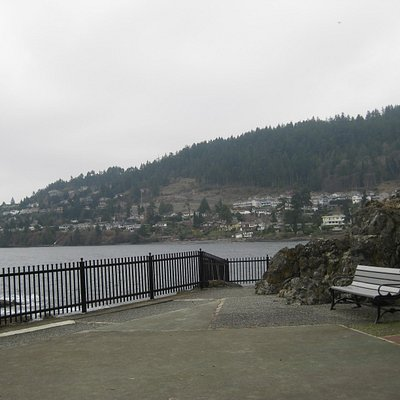





Lost Lake in the provience of BC 

D̲e̲t̲a̲i̲l̲s̲ ̲a̲b̲o̲u̲t̲ ̲t̲h̲e̲ ̲a̲t̲t̲r̲a̲c̲t̲i̲o̲n̲ ̲a̲r̲e̲ ̲s̲p̲e̲c̲i̲f̲i̲e̲d̲ ̲b̲e̲l̲o̲w̲: 

Average Rating : 4.5 

Complete Address : Whistler, British Columbia Canada 

Best time to visit in the year : all time 

General visiting hours : Thu - Thu 12:00 AM - 11:59 PM 

Website Link : http://www.whistler.ca/lost-lake-park 



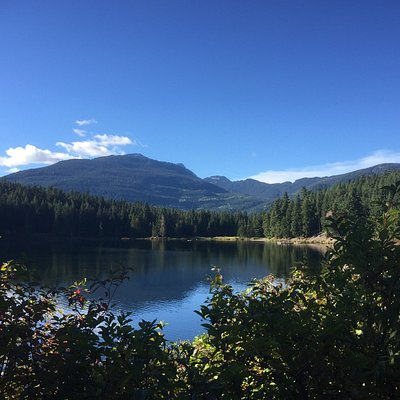





Prince Edward Island National Park in the provience of edward island 

D̲e̲t̲a̲i̲l̲s̲ ̲a̲b̲o̲u̲t̲ ̲t̲h̲e̲ ̲a̲t̲t̲r̲a̲c̲t̲i̲o̲n̲ ̲a̲r̲e̲ ̲s̲p̲e̲c̲i̲f̲i̲e̲d̲ ̲b̲e̲l̲o̲w̲: 

Average Rating : 4.5 

Complete Address : Prince Edward Island Canada 

Best time to visit in the year : all time 

General visiting hours : Fri - Sun 10:00 AM - 4:00 PM 

Website Link : http://www.pc.gc.ca/pn-np/pe/pei-ipe/visit.aspx 



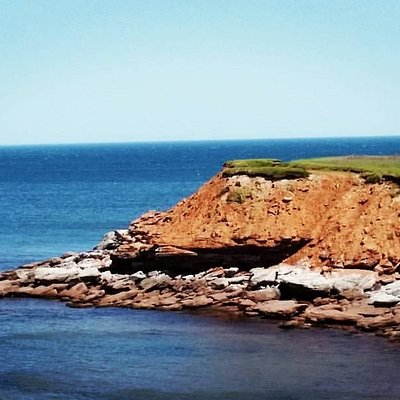

In [ ]:
location_user_likes = input("Enter a previous location you visited to help us come up with similar recommendations: ")
model=contect_based_combined(location_user_likes)

Getting the results for combined-content based filtering in form of a single list

In [ ]:
from itertools import islice

list1=[]

def contect_based_combined_list(location_user_likes):
  location_locationId= get_locationId_from_location(location_user_likes)
  similar_locations = list(enumerate(cosine_sim[location_locationId])) #accessing the row corresponding to given location to find all the similarity scores for that location and then enumerating over it
  sorted_similar_locations = sorted(similar_locations,key=lambda x:x[1],reverse=True)[1:]
  
  i=0
  for element in sorted_similar_locations:
      list1.append((get_location_from_locationId(element[0])))
      list1.append((get_provience_from_locationId(element[0])))
      list1.append((get_ratings_from_locationId(element[0])))
      list1.append((get_address_from_locationId(element[0])))
      list1.append((get_best_time_from_locationId(element[0])))
      list1.append((get_visiting_hours_from_locationId(element[0])))

      i=i+1
      if i>2:
          break
  
  list_final = [list1[i:i + 6] for i in range(0, len(list1), 6)]
  print(list_final)




  

In [ ]:
location_user_likes = input("Enter a previous location you visited to help us come up with similar recommendations: ")
model=contect_based_combined_list(location_user_likes)



Enter a previous location you visited to help us come up with similar recommendations: Stanley Park
[['Neck Point Park', 'BC', 4.5, 'Morningside Drive, Nanaimo, British Columbia Canada', 'all time', 'Fri - Sun 10:00 AM - 4:00 PM'], ['Lost Lake', 'BC', 4.5, 'Whistler, British Columbia Canada', 'all time', 'Thu - Thu 12:00 AM - 11:59 PM'], ['Prince Edward Island National Park', 'edward island', 4.5, 'Prince Edward Island Canada', 'all time', 'Fri - Sun 10:00 AM - 4:00 PM']]


In [ ]:
import pickle

# Save machine learning model
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# For, loading the final model
 
with open('finalized_model.sav', 'rb') as fid:
  model = pickle.load(fid)



None
